In [1]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
% pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation,metrics
from sklearn.grid_search import GridSearchCV

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ambar Gupta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ambar Gupta\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [107]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
features = ['vendor_id','tolls_amount', 'tip_amount', 'mta_tax','passenger_count','rate_code','surcharge',
            'total_jrny', 'CRD','CSH', 'DIS', 'NOC', 'UNK', 'distance']

In [4]:
train = pd.read_csv('updated_train.csv')
train.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,passenger_count,rate_code,surcharge,fare_amount,CRD,CSH,DIS,NOC,UNK,total_jrny,distance
0,AIX000345001,0,0,0.0,1.4,0.5,1,1,0.5,8.4,1.0,0.0,0.0,0.0,0.0,5.916667,1.310554
1,AIX000345002,0,0,0.0,1.0,0.5,3,1,0.0,8.5,1.0,0.0,0.0,0.0,0.0,5.983333,2.597243
2,AIX000345003,0,0,0.0,0.0,0.5,2,1,0.0,7.0,0.0,1.0,0.0,0.0,0.0,5.550000,1.535378
3,AIX000345004,2,0,0.0,1.8,0.5,2,1,0.0,11.3,1.0,0.0,0.0,0.0,0.0,12.000000,1.598049
4,AIX000345005,0,0,0.0,0.0,0.5,1,1,0.0,10.0,0.0,1.0,0.0,0.0,0.0,13.700000,1.628146


C:\Users\Ambar Gupta\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x2b598258e10>],
 'caps': [<matplotlib.lines.Line2D at 0x2b59827e7b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b598277f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2b598277198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2b598258b00>,
  <matplotlib.lines.Line2D at 0x2b598248f60>]}

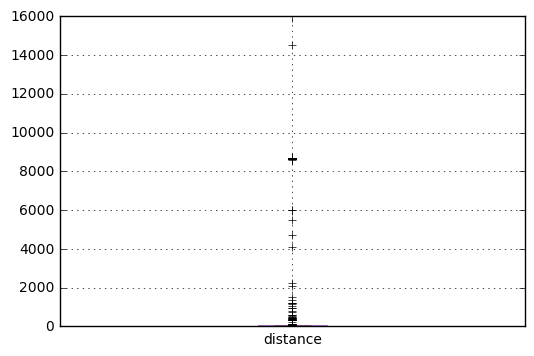

In [153]:
train.boxplot(column='distance')

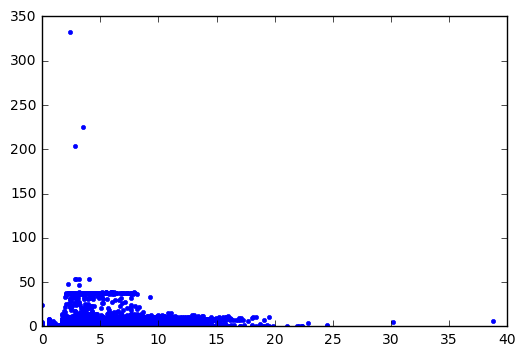

In [158]:
plt.plot(np.sqrt(train['fare_amount']),np.sqrt(train['total_jrny']),'b.')

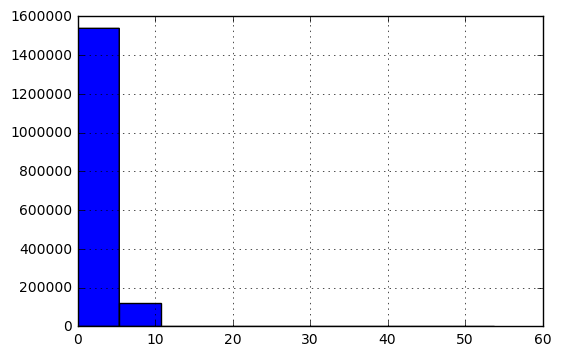

In [172]:
np.sqrt(train['total_jrny']).hist()

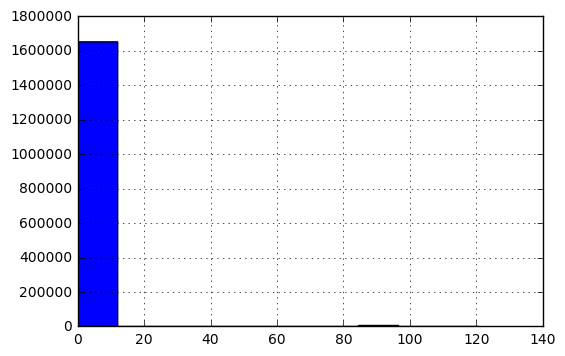

In [185]:
np.sqrt(train['distance']).hist()

In [160]:
train = train[np.sqrt(train['total_jrny'])<100]

In [163]:
len(train)

1658094

In [162]:
train = train[np.sqrt(train['fare_amount'])<25]

In [173]:
df1 = train.sample(frac=0.01)

In [176]:
X = df1[features]
y = np.sqrt(df1['fare_amount'])

In [174]:
train['total_jrny'] = np.sqrt(train['total_jrny'])

In [198]:
xgbmodel = XGBRegressor(learning_rate =0.1, n_estimators=100, max_depth=9,
 min_child_weight=3, gamma=0.005, colsample_bylevel=0.60,colsample_bytree=0.6,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27,subsample=0.7,reg_alpha=0.01)

In [116]:
tree_model = DecisionTreeRegressor()

In [120]:
lin_model = LinearRegression(normalize=True)

In [199]:
xgbmodel.fit(X,y)

XGBRegressor(base_score=0.5, colsample_bylevel=0.6, colsample_bytree=0.6,
       gamma=0.005, learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=3, missing=None, n_estimators=100, nthread=4,
       objective='reg:linear', reg_alpha=0.01, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.7)

In [121]:
tree_model.fit(train[features],np.sqrt(train['fare_amount']))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [122]:
lin_model.fit(train[features],np.sqrt(train['fare_amount']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [60]:
test = pd.read_csv('updated_test.csv')

In [61]:
X_test = test[features]

In [200]:
pred = xgbmodel.predict(X_test)
pred = np.square(pred)

In [127]:
pred1 = tree_model.predict(X_test)
pred1 = np.square(pred1)

In [123]:
pred2 = lin_model.predict(X_test)
pred2 = np.square(pred2)

In [201]:
pred[0],pred1[0],pred2[0]

(4.9031358, 4.7999999999999972, 10.397416781866923)

In [ ]:
pred1[0]

In [112]:
pred1[0]

125.79205819783965

In [71]:
submission = pd.DataFrame(data=[], columns=['TID', 'fare_amount'])
submission.TID = test.TID; submission.fare_amount = pred
submission.to_csv('combined1000.csv', index=False)
submission.head()

,TID,fare_amount
0,AJX000119871,4.952738
1,AJX000119872,7.797564
2,AJX000119873,10.589368
3,AJX000119874,20.425188
4,AJX000119875,15.667763


In [81]:
a = pd.read_csv('xgboost.csv')['fare_amount']

In [82]:
b = pd.read_csv('xgboost1.csv')['fare_amount']

In [149]:
x = pred*0.75+pred1*0.25

In [150]:
x[0]

4.9145538330078118

In [86]:
y = (a+x)/2

In [87]:
y.head()

0     4.918156
1     7.673883
2    10.635391
3    19.709707
4    15.360711
Name: fare_amount, dtype: float64

In [151]:
submission = pd.DataFrame(data=[], columns=['TID', 'fare_amount'])
submission.TID = test.TID; submission.fare_amount = x
submission.to_csv('xy.csv', index=False)
submission.head()

,TID,fare_amount
0,AJX000119871,4.914554
1,AJX000119872,7.738173
2,AJX000119873,10.692026
3,AJX000119874,20.068892
4,AJX000119875,15.825822
